In [1]:
import plotly.graph_objs as go
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
import edhec_risk_kit as erk
import pandas as pd
import numpy as np
import config
from statsmodels.distributions.empirical_distribution import ECDF
%load_ext autoreload
%autoreload 2

In [2]:
all_data = erk.get_df(filename=config.fileName,format=config.dateFormat, mode=None, to_per=True)
all_data.columns = all_data.columns.str.replace(' ', '_')

In [20]:
plot_data = {}
plot_data.update(Real_Estate=all_data['Real_Estate'])

In [21]:
wealth_data_plots, risk_info = erk.get_wealth_index_risk(plot_data)

In [22]:
pyo.iplot(wealth_data_plots)
risk_info

,Real_Estate
ann_ret,0.001106
ann_vol,0.002806
sharpe_ratio,-10.297409
semi_dev,0.000718
Kurtosis,9.107918
Skew,-0.201885
VaR,-0.001181
CVaR,-0.002395
Drawdown,-0.007561


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Real_Estate   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     59.99
Date:                Thu, 30 Jul 2020   Prob (F-statistic):           1.63e-46
Time:                        14:56:26   Log-Likelihood:                 2580.8
No. Observations:                 405   AIC:                            -5150.
Df Residuals:                     399   BIC:                            -5126.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
World_Equities           0.3103      0.051      6.036      0.000       0.209       0.411
US_Treasuries            1.2125      0.121     10.027      0.000       0.975       1.450
Bond_Risk_Premium        1.0542      0.103     10.208      0.000       0.851       1.257
Inflation_Protection     0.2879      0.129      2.229      0.026       0.034       0.542
Currency_Protection      0.3618      0.173      2.090      0.037       0.021       0.702
Alpha                -3.587e-05   2.28e-05     -1.575      0.116   -8.06e-05     8.9e-06
==============================================================================
Omnibus:                       81.133   Durbin-Watson:                   2.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1295.204
Skew:                           0.254   Prob(JB):                    5.63e-282
Kurtosis:                      11.746   Cond. No.                     8.43e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [3]:
# adding noise

np.random.seed(1245)
n_periods = all_data.shape[0]
base = np.reshape(np.array(all_data['World_Equities']), (n_periods, 1))
noise = np.random.normal(loc=base, scale=base.std()*2, size=(n_periods,1))
all_data['Noise'] = noise

In [6]:
explanatory_df_noise = all_data[config.factorName_Noise]
dependent_df_noise = all_data[config.asset_class]
regression_result_noise = erk.regress(dependent_df_noise, explanatory_df_noise, excess_mkt=False, rfcol=config.rfcol)

In [7]:
regression_result_noise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Real_Estate   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     49.94
Date:                Fri, 31 Jul 2020   Prob (F-statistic):           1.17e-45
Time:                        12:37:47   Log-Likelihood:                 2580.9
No. Observations:                 405   AIC:                            -5148.
Df Residuals:                     398   BIC:                            -5120.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
World_Equities           0.3231      0.057      5.646      0.000       0.211       0.436
US_Treasuries            1.2140      0.121     10.027      0.000       0.976       1.452
Bond_Risk_Premium        1.0542      0.103     10.198      0.000       0.851       1.257
Inflation_Protection     0.2835      0.130      2.187      0.029       0.029       0.538
Currency_Protection      0.3620      0.173      2.088      0.037       0.021       0.703
Noise                   -0.0106      0.021     -0.512      0.609      -0.051       0.030
Alpha                -3.654e-05   2.28e-05     -1.600      0.110   -8.14e-05    8.35e-06
==============================================================================
Omnibus:                       81.023   Durbin-Watson:                   2.286
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1280.814
Skew:                           0.258   Prob(JB):                    7.49e-279
Kurtosis:                      11.697   Cond. No.                     8.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# regime changes
normal_mask = all_data['US_Equities'] > 0
crash_mask = all_data['US_Equities'] < 0

explanatory_df_all = all_data[config.factorName]
dependent_df_all = all_data[config.asset_class]

explanatory_df_normal = explanatory_df_all[normal_mask]
dependent_df_normal = dependent_df_all[normal_mask]

explanatory_df_crash = explanatory_df_all[crash_mask]
dependent_df_crash = dependent_df_all[crash_mask]

regression_result_all = erk.regress(dependent_df_all, explanatory_df_all, excess_mkt=False, rfcol=config.rfcol)
regression_result_normal = erk.regress(dependent_df_normal, explanatory_df_normal, excess_mkt=False, rfcol=config.rfcol)
regression_result_crash = erk.regress(dependent_df_crash, explanatory_df_crash, excess_mkt=False, rfcol=config.rfcol)

In [17]:
regression_result_all.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Real_Estate   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     59.99
Date:                Fri, 31 Jul 2020   Prob (F-statistic):           1.63e-46
Time:                        14:48:21   Log-Likelihood:                 2580.8
No. Observations:                 405   AIC:                            -5150.
Df Residuals:                     399   BIC:                            -5126.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
World_Equities           0.3103      0.051      6.036      0.000       0.209       0.411
US_Treasuries            1.2125      0.121     10.027      0.000       0.975       1.450
Bond_Risk_Premium        1.0542      0.103     10.208      0.000       0.851       1.257
Inflation_Protection     0.2879      0.129      2.229      0.026       0.034       0.542
Currency_Protection      0.3618      0.173      2.090      0.037       0.021       0.702
Alpha                -3.587e-05   2.28e-05     -1.575      0.116   -8.06e-05     8.9e-06
==============================================================================
Omnibus:                       81.133   Durbin-Watson:                   2.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1295.204
Skew:                           0.254   Prob(JB):                    5.63e-282
Kurtosis:                      11.746   Cond. No.                     8.43e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
regression_result_normal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Real_Estate   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     23.54
Date:                Fri, 31 Jul 2020   Prob (F-statistic):           1.53e-19
Time:                        12:41:02   Log-Likelihood:                 1751.9
No. Observations:                 269   AIC:                            -3492.
Df Residuals:                     263   BIC:                            -3470.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
World_Equities           0.1502      0.067      2.251      0.025       0.019       0.282
US_Treasuries            1.3029      0.144      9.042      0.000       1.019       1.587
Bond_Risk_Premium        1.1006      0.131      8.387      0.000       0.842       1.359
Inflation_Protection     0.2102      0.142      1.477      0.141      -0.070       0.490
Currency_Protection      0.0518      0.196      0.265      0.791      -0.333       0.437
Alpha                  3.48e-05   3.15e-05      1.104      0.271   -2.73e-05    9.69e-05
==============================================================================
Omnibus:                      176.288   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3544.164
Skew:                           2.237   Prob(JB):                         0.00
Kurtosis:                      20.210   Cond. No.                     8.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
regression_result_crash.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Real_Estate   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     14.46
Date:                Fri, 31 Jul 2020   Prob (F-statistic):           3.10e-11
Time:                        12:41:03   Log-Likelihood:                 838.40
No. Observations:                 135   AIC:                            -1665.
Df Residuals:                     129   BIC:                            -1647.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
World_Equities           0.3678      0.096      3.816      0.000       0.177       0.559
US_Treasuries            0.9523      0.229      4.154      0.000       0.499       1.406
Bond_Risk_Premium        0.7805      0.189      4.129      0.000       0.407       1.154
Inflation_Protection     0.5368      0.263      2.042      0.043       0.017       1.057
Currency_Protection      0.5744      0.349      1.645      0.102      -0.116       1.265
Alpha                   -0.0001   5.03e-05     -2.286      0.024      -0.000   -1.55e-05
==============================================================================
Omnibus:                       33.834   Durbin-Watson:                   1.324
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.886
Skew:                          -0.978   Prob(JB):                     3.69e-19
Kurtosis:                       6.356   Cond. No.                     8.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
# Lasso
explanatory_df_all = all_data[config.factorName]
dependent_df_all = all_data[config.asset_class]
sk_lasso = erk.regress(dependent_df_all, explanatory_df_all, excess_mkt=False, rfcol=config.rfcol, method='lasso', lamda=0.1)


        Regression method is lasso
        Time period is 1985-01 - 2018-09
    
       intercept  World_Equities  US_Treasuries  Bond_Risk_Premium  \
lasso   0.001834        0.349738         0.5422           0.574002   

       Inflation_Protection  Currency_Protection  
lasso                   0.0                  0.0  


In [4]:
#Lasso with noise
explanatory_df_all = all_data[config.factorName_Noise]
dependent_df_all = all_data[config.asset_class]
sk_ridge = erk.regress(dependent_df_all, explanatory_df_all, excess_mkt=False, rfcol=config.rfcol, method='lasso', lamda=0.1)



        Regression method is lasso
        Time period is 1985-01 - 2018-09
        Alpha is 0.0001234567901234568
        Lambda is 0.1
    
       intercept  World_Equities  US_Treasuries  Bond_Risk_Premium  \
lasso   0.001834        0.349738         0.5422           0.574002   

       Inflation_Protection  Currency_Protection  Noise  
lasso                   0.0                  0.0    0.0  


In [14]:
# CV_Lasso
explanatory_df_all = all_data[config.factorName]
dependent_df_all = all_data[config.asset_class]
cv_lasso = erk.regress(dependent_df_all, explanatory_df_all, excess_mkt=False, rfcol=config.rfcol, method='cv_lasso')

Max_alpha is : 0.00030864197530864197

        Regression method is cv_lasso
        Time period is 1985-01 - 2018-09
        Alpha is 6.004239930165855e-05
        Lambda is 0.048634343434343426
    
          intercept  World_Equities  US_Treasuries  Bond_Risk_Premium  \
cv_lasso  -0.000342        0.311805       0.875641           0.835079   

          Inflation_Protection  Currency_Protection  
cv_lasso              0.044825                  0.0  


In [5]:
# CV_Lasso with noise
explanatory_df_all = all_data[config.factorName_Noise]
dependent_df_all = all_data[config.asset_class]
cv_lasso = erk.regress(dependent_df_all, explanatory_df_all, excess_mkt=False, rfcol=config.rfcol, method='cv_lasso')



Max_alpha is : 0.00030864197530864197

        Regression method is cv_lasso
        Time period is 1985-01 - 2018-09
        Alpha is 8.17948622022696e-05
        Lambda is 0.06625383838383839
    
          intercept  World_Equities  US_Treasuries  Bond_Risk_Premium  \
cv_lasso   0.000441        0.324436       0.759458           0.748534   

          Inflation_Protection  Currency_Protection  Noise  
cv_lasso                   0.0                  0.0   -0.0  


In [5]:
#CV_ElasticNet
explanatory_df_all = all_data[config.factorName]
dependent_df_all = all_data[config.asset_class]
cv_lasso = erk.regress(dependent_df_all, explanatory_df_all, excess_mkt=False, rfcol=config.rfcol, method='cv_elasticnet')


            Best L1 ratio is : 0.9495918775510204
            Best Lasso_Lambda is : 0.050585758887540265            
            Best Ridge_Lambda is : 0.0013426468720193349
        

        Regression method is cv_elasticnet
        Time period is 1985-01 - 2018-09
        Alpha is 6.576673164392461e-05
        Lambda is 0.050585758887540265
    
               intercept  World_Equities  US_Treasuries  Bond_Risk_Premium  \
cv_elasticnet  -0.000159        0.315769       0.847193           0.813355   

               Inflation_Protection  Currency_Protection  
cv_elasticnet              0.035633                  0.0  


In [6]:
#CV_ElasticNet noise
explanatory_df_all = all_data[config.factorName_Noise]
dependent_df_all = all_data[config.asset_class]
cv_lasso = erk.regress(dependent_df_all, explanatory_df_all, excess_mkt=False, rfcol=config.rfcol, method='cv_elasticnet')


            Best L1 ratio is : 0.99
            Best Lasso_Lambda is : 0.06572245263157893            
            Best Ridge_Lambda is : 0.00033193157894736866
        

        Regression method is cv_elasticnet
        Time period is 1985-01 - 2018-09
        Alpha is 8.195841455490576e-05
        Lambda is 0.06572245263157893
    
               intercept  World_Equities  US_Treasuries  Bond_Risk_Premium  \
cv_elasticnet    0.00044        0.324609       0.759465           0.748479   

               Inflation_Protection  Currency_Protection  Noise  
cv_elasticnet                   0.0                  0.0   -0.0  


In [5]:
#ML_TEST_WEEK2

test_data = erk.get_df(filename=config.fileName,format=config.dateFormat, start_period='2000', mode=None, to_per=True)
test_data.columns = test_data.columns.str.replace(' ', '_')

In [6]:
explanatory_df_test = test_data[config.factorName]
dependent_df_comm = test_data[config.asset_class_user]
regression_result_test = erk.regress(dependent_df_comm, explanatory_df_test, excess_mkt=False, rfcol=config.rfcol)

In [8]:
regression_result_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Commodities   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     24.10
Date:                Wed, 05 Aug 2020   Prob (F-statistic):           2.69e-19
Time:                        18:36:40   Log-Likelihood:                 339.10
No. Observations:                 225   AIC:                            -666.2
Df Residuals:                     219   BIC:                            -645.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
World_Equities           0.3646      0.109      3.356      0.001       0.150       0.579
US_Treasuries           -0.5526      0.233     -2.376      0.018      -1.011      -0.094
Bond_Risk_Premium       -0.2268      0.198     -1.145      0.253      -0.617       0.163
Inflation_Protection     1.8561      0.348      5.340      0.000       1.171       2.541
Currency_Protection     -0.9864      0.334     -2.952      0.004      -1.645      -0.328
Alpha                    0.0031      0.004      0.806      0.421      -0.004       0.011
==============================================================================
Omnibus:                        0.828   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.537
Skew:                           0.074   Prob(JB):                        0.764
Kurtosis:                       3.188   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
cv_lasso_comm = erk.regress(dependent_df_comm, explanatory_df_test, excess_mkt=False, rfcol=config.rfcol, method='cv_lasso')

Max_alpha is : 0.0005555555555555556

        Regression method is cv_lasso
        Time period is 2000-01 - 2018-09
        Alpha is 2.9007856341189672e-05
        Lambda is 0.013053535353535352
    
          intercept  World_Equities  US_Treasuries  Bond_Risk_Premium  \
cv_lasso   0.001742        0.341915      -0.281213               -0.0   

          Inflation_Protection  Currency_Protection  
cv_lasso              1.506718            -0.747364  


start week 3


In [3]:
asset_data = erk.get_df('data/Assets_7.csv', format=config.dateFormat, to_per=True, mode=None)

In [4]:
asset_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 409 entries, 1985-01 to 2019-01
Freq: M
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   US Equities     409 non-null    float64
 1   World Equities  409 non-null    float64
 2   US Treasuries   409 non-null    float64
 3   High Yield      409 non-null    float64
 4   Real Estate     409 non-null    float64
 5   Commodities     409 non-null    float64
 6   Corp Bonds      409 non-null    float64
 7   T-bill          409 non-null    float64
 8   TIPS            409 non-null    object 
 9   Regime-5        409 non-null    int64  
 10  Regime-7        409 non-null    int64  
 11  Regime-9        409 non-null    int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 39.9+ KB


In [5]:
asset_data['TIPS'] = asset_data['TIPS'].str.replace('%', '').astype('float')/100

In [6]:
asset_data.columns = asset_data.columns.str.replace(' ', '_')

In [6]:
rets, ret_gr, ret_cr = erk.split_regime_returns(asset_data, config.asset_categories, 'Regime-5')

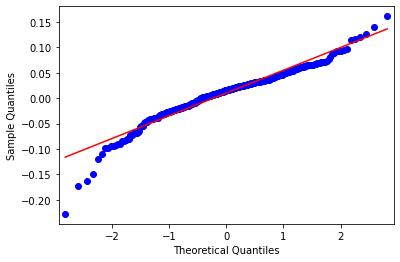

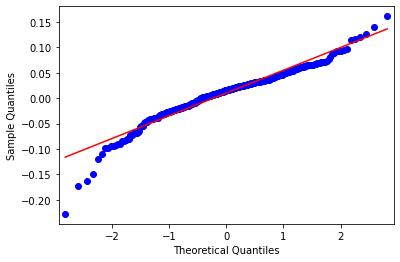

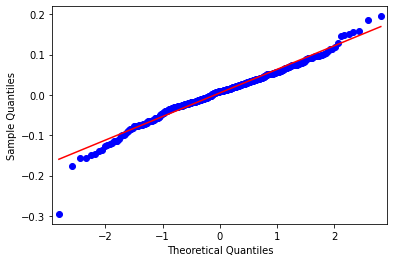

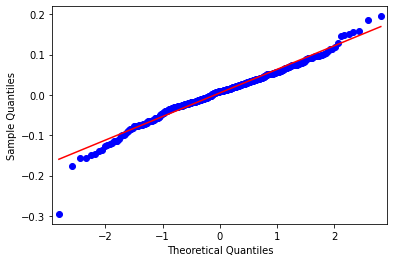

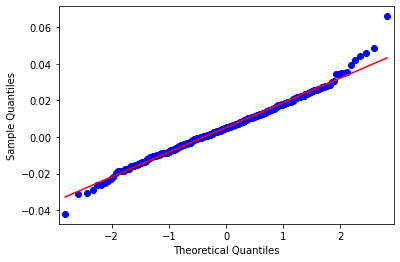

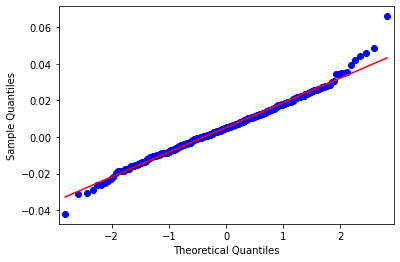

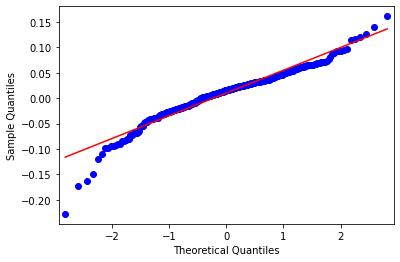

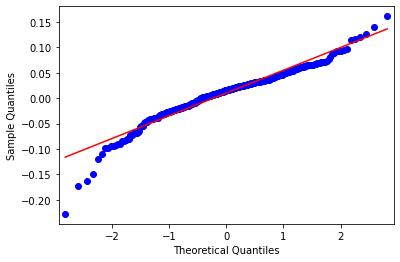

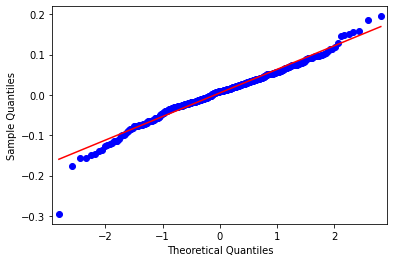

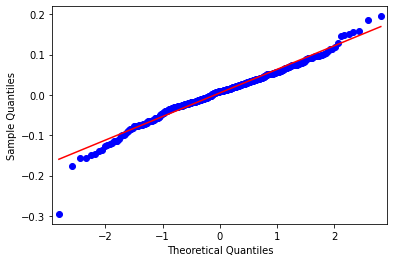

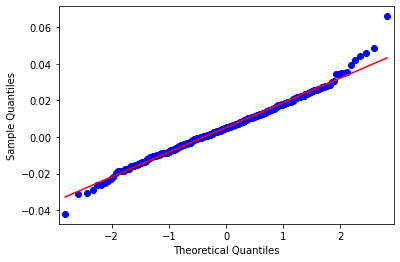

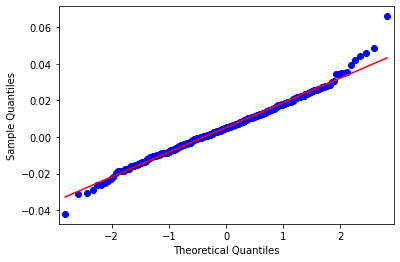

In [14]:
fig = erk.QQ_plot(rets, ['US_Equities', 'Commodities', 'US_Treasuries'])
pyo.iplot(fig)


In [12]:
ecdf_fig = erk.ecdf_plot(rets, ['US_Equities', 'Commodities', 'US_Treasuries'])
pyo.iplot(ecdf_fig)

In [2]:
sp500_data = erk.get_df('data/SP500.csv', mode=None, format=config.dateFormat, reqd_strategies=['SP500'], to_per=True)
# sp500_data = sp500_data.pct_change().dropna()

In [5]:
fig = erk.trend_filter_plot(sp500_data['SP500'], 16,1e-5)

In [6]:
pyo.iplot(fig)

In [ ]:
erk.plot_eff_frontier(ret_series=erk.get_ann_return(rets), cov_df=erk.get_cov(rets), n_points=25, reqd_strategies=config.asset_categories, rf=0.03)

Dash is running on http://127.0.0.1:8050/

 in production, use a production WSGI server like gunicorn instead.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)


In [ ]:
erk.plot_eff_frontier(ret_series=erk.get_ann_return(ret_gr), cov_df=erk.get_cov(ret_gr), n_points=25, reqd_strategies=config.asset_categories, rf=0.03)


Dash is running on http://127.0.0.1:8050/

 in production, use a production WSGI server like gunicorn instead.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/home/namperumal/PycharmProjects/venv/lib/python3.8/site-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/namperumal/PycharmProjects/venv/lib/python3.8/site-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/namperumal/PycharmProjects/venv/lib/python3.8/site-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/home/namperumal/PycharmProjects/venv/lib/python3.8/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/home/namperumal/PycharmProjects/venv/lib/python3.8/site

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [17/Aug/2020 18:01:19] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2020 18:01:19] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2020 18:01:19] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2020 18:01:20] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [17/Aug/2020 18:01:21] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2020 18:01:25] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2020 18:01:25] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2020 18:01:38] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2020 18:01:38] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2020 18:01:38] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2020 18:01:38] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2020 18:01:38] "POST /_dash-update-component

In [ ]:
erk.plot_eff_frontier(ret_series=erk.get_ann_return(ret_cr), cov_df=erk.get_cov(ret_cr), n_points=25, reqd_strategies=config.asset_categories, rf=0.03)


Dash is running on http://127.0.0.1:8050/

 in production, use a production WSGI server like gunicorn instead.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/home/namperumal/PycharmProjects/venv/lib/python3.8/site-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/namperumal/PycharmProjects/venv/lib/python3.8/site-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/namperumal/PycharmProjects/venv/lib/python3.8/site-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/home/namperumal/PycharmProjects/venv/lib/python3.8/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/home/namperumal/PycharmProjects/venv/lib/python3.8/site

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [17/Aug/2020 18:05:17] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2020 18:05:21] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2020 18:05:22] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2020 18:05:22] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2020 18:05:22] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [17/Aug/2020 18:05:32] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2020 18:05:32] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2020 18:05:32] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2020 18:05:34] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2020 18:05:34] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2020 18:05:35] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2020 18:05:35] "POST /_dash-update-component

In [7]:
mvn = np.random.multivariate_normal(erk.get_ann_return(rets), erk.get_cov(rets), 100)

USING MULTIVARIATE NORMAL DIST, AND FINDING MEAN AND COV FROM A SAMPLE OF N SCENARIOS INSTEAD OF HISTORICAL DATA



In [14]:
mu_mvn = pd.Series(np.mean(mvn, axis=0), index=config.asset_categories)
cov_mvn = pd.DataFrame(np.cov(mvn.T), index=config.asset_categories, columns=config.asset_categories)

In [ ]:
erk.plot_eff_frontier(ret_series=mu_mvn, cov_df=cov_mvn, n_points=25, reqd_strategies=config.asset_categories, rf=0.03)


Dash is running on http://127.0.0.1:8050/

 in production, use a production WSGI server like gunicorn instead.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/home/namperumal/PycharmProjects/venv/lib/python3.8/site-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/namperumal/PycharmProjects/venv/lib/python3.8/site-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/namperumal/PycharmProjects/venv/lib/python3.8/site-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/home/namperumal/PycharmProjects/venv/lib/python3.8/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/home/namperumal/PycharmProjects/venv/lib/python3.8/site

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [17/Aug/2020 18:17:58] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2020 18:17:59] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2020 18:17:59] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2020 18:17:59] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [17/Aug/2020 18:18:03] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2020 18:18:03] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2020 18:18:03] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2020 18:18:03] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2020 18:18:03] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2020 18:18:04] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2020 18:18:28] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2020 18:18:28] "POST /_dash-update-component

In [7]:
#stationarity in transition - markov rule
asset_rets_scen = erk.get_multivariate_sim_scenario_rets(asset_data, 50, 1000,
                                                     'Regime-5')  # array(scenario by time by assets)
wts_array = np.array([.3, 0, .2, .2, .1, 0, .15, .05])
wealth_index = erk.build_pf_ret(asset_rets_scen, wts_array, rebal_freq=3, spending_rate=0.07)
terminal_wealth = pd.DataFrame(wealth_index[-1]).describe()
print(terminal_wealth)

Unique stationary pi exist
                 0
count  1000.000000
mean      1.633378
std       0.694945
min       0.323508
25%       1.127968
50%       1.510480
75%       1.988998
max       5.463958


In [9]:
#start week 5 - preprocessing
bigmacro = erk.get_df('coursera/Lab 3 - Module 5/Coursera Files/Macroeconomic_Variables.csv',mode=None, format='%m/%d/%Y')
bigmacro1 = bigmacro.iloc[:132]
bigmacro2 = bigmacro.iloc[132:]
bigmacro1.index -= pd.DateOffset(years=100)
bigmacro = pd.concat([bigmacro1, bigmacro2])
bigmacro.index = bigmacro.index.to_period('M')
recession_data = pd.read_csv('coursera/Lab 3 - Module 5/Coursera Files/Recession_Periods.csv')
bigmacro.insert(loc=0, column='Regime', value=recession_data['Regime'].values)


In [10]:
null_count_col_wise = bigmacro.isna().sum()
#Cols with more than 10 null values are to be removed
null_mask = null_count_col_wise > 10
drop_null_col = list(null_count_col_wise[null_mask].index)
bigmacro.drop(drop_null_col, axis=1, inplace=True)
bigmacro.dropna(inplace=True, axis=0)

In [11]:
for col in bigmacro.drop(['Regime'], axis=1):
    for lag in [3,6,9,12,18]:
        bigmacro['{}_{}M_lag'.format(col,lag)] = bigmacro[col].shift(lag).ffill()
# 1 month ahead prediction
bigmacro['Regime'] = bigmacro['Regime'].shift(-1)

bigmacro.dropna(axis=0, inplace=True)

In [12]:
# Check stationarity in time series data
# We will perform adfuller test to check unit roots 3 times.
# First time for non-stationary series we will take first order difference
# Second time we will take second order difference
# Third time if there are still remaining non-stationary columns we will drop them from feature set

bigmacro_features = bigmacro.drop(['Regime'], axis=1)
stationary_df = erk.retrieve_stationary_time_series(bigmacro_features)

In [13]:
regime_col = pd.DataFrame(bigmacro['Regime'])
standardised_df = erk.standardise_data(stationary_df)
standardised_df = pd.merge(regime_col, standardised_df, right_index=True, left_index=True, how='right')
standardised_df.to_csv('Dataset_cleaned.csv', index=False)

In [14]:
standardised_df.to_csv('Dataset_cleaned.csv')

In [15]:
dataset = pd.read_csv('Datset_cleaned.csv', index_col='sasdate')
dataset.index = pd.to_datetime(dataset.index, format='%Y-%m').to_period('M')
label = dataset['Regime'].apply(lambda regime: 1 if regime == 'Normal' else 0)
dataset.insert(loc=2, column='Label', value=label.values)

,Regime,RPI,Label,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,...,DTCTHFNM_3M_lag,DTCTHFNM_6M_lag,DTCTHFNM_9M_lag,DTCTHFNM_12M_lag,DTCTHFNM_18M_lag,INVEST_3M_lag,INVEST_6M_lag,INVEST_9M_lag,INVEST_12M_lag,INVEST_18M_lag
sasdate,,,,,,,,,,,,,,,,,,,,,
1960-09,Recession,-0.277761,0,-0.295013,-0.212118,0.401363,-0.321981,-0.764446,-0.632790,-0.465458,...,-0.076853,-0.092745,-0.087114,-0.085455,-0.099002,-0.454463,-0.566992,-0.395095,-0.450998,-0.576728
1960-10,Recession,-0.204460,0,-0.161434,-0.204519,-0.978339,-0.239615,-0.308591,0.059474,-0.009134,...,-0.081327,-0.084890,-0.103429,-0.089335,-0.090643,-0.255545,-0.415804,-0.483302,-0.473520,-0.396661
1960-11,Recession,-0.520186,0,-0.577658,-0.785798,-0.611700,-0.435990,-0.935469,-0.748034,-0.719013,...,-0.084509,-0.087674,-0.095868,-0.095503,-0.087956,-0.404823,-0.392308,-0.605015,-0.445070,-0.505897
1960-12,Recession,-0.531320,0,-0.581530,-1.397470,0.071269,-0.375495,-1.163499,-0.921200,-0.769798,...,-0.095048,-0.076637,-0.094476,-0.087146,-0.076214,-0.331993,-0.453979,-0.578110,-0.389378,-0.589579
1961-01,Normal,0.054513,1,0.096044,-0.375484,-1.608684,-0.307555,-0.194576,-0.286457,-0.313288,...,-0.103002,-0.081112,-0.086616,-0.103462,-0.076910,-0.250758,-0.253854,-0.425585,-0.477942,-0.385123


PeriodIndex(['1960-09', '1960-10', '1960-11', '1960-12', '1961-01', '1961-02',
             '1961-03', '1961-04', '1961-05', '1961-06',
             ...
             '1917-12', '1918-01', '1918-02', '1918-03', '1918-04', '1918-05',
             '1918-06', '1918-07', '1918-08', '1918-09'],
            dtype='period[M]', name='sasdate', length=697, freq='M')

KeyError: Period('1996-12', 'M')